In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import glob
sns.set_style('whitegrid')
from skbio.diversity import beta_diversity
import numpy as np
from skbio.stats.distance import mantel
from skbio.stats.ordination import pcoa
import pandas as pd
from skbio.stats.distance import anosim
import os
from Bio import SeqIO

In [55]:
abun_df = pd.read_csv('/data4/human/candida_sampling/other/baby_06_DNA_RNA_rel_abun2.csv')

In [56]:
abun_df.loc[(abun_df['Date'] == 30) & (abun_df['Type'] == 'DNA'), 'Abundance' ] = np.nan

In [57]:
abun_df_prot = pd.read_csv('/data4/human/candida_sampling/proteomics/baby_proteomics_abundance.txt', sep='\t')

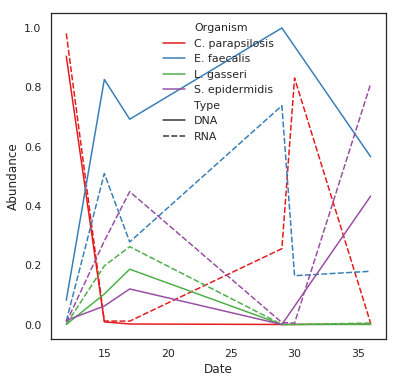

In [58]:
sns.set_style('white')
sns.set_palette("Set1")
sns.lineplot(x='Date', y='Abundance', data=abun_df, hue='Organism', style='Type', dashes=True)
plt.gcf().set_size_inches(6, 6)
plt.show()

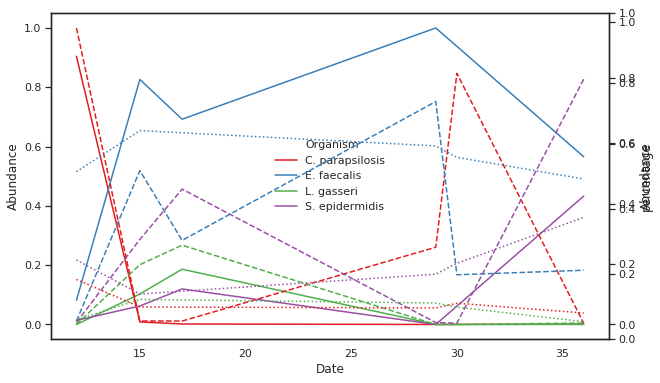

In [59]:
fig, ax = plt.subplots()
sns.set_style('white')
sns.set_palette("Set1")
sns.lineplot(x='Date', y='Abundance', data=abun_df.loc[abun_df['Type'] == 'DNA'], hue='Organism', dashes=False, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Abundance', data=abun_df.loc[abun_df['Type'] == 'RNA'], hue='Organism', dashes=False, ax=ax2)
ax3 = ax.twinx()
sns.lineplot(x='date', y='percentage', data=abun_df_prot, hue='organism', dashes=False, ax=ax3)


ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")
ax2.lines[2].set_linestyle("--")
ax2.lines[3].set_linestyle("--")

ax3.lines[0].set_linestyle(":")
ax3.lines[1].set_linestyle(":")
ax3.lines[2].set_linestyle(":")
ax3.lines[3].set_linestyle(":")

ax3.set_ylim(0,1)

plt.gcf().set_size_inches(10, 6)
#ax.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
plt.show()

#seaborn.kdeplot(df['col1'], ax=ax)
#seaborn.kdeplot(df['col2'], ax=ax)

In [65]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

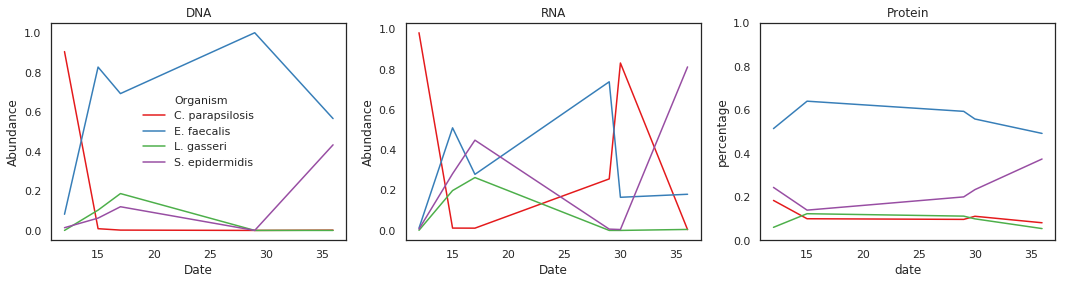

In [66]:
sns.set_style('white')
sns.set_palette("Set1")
plt.subplot(1, 3, 1)
ax = sns.lineplot(x='Date', y='Abundance', data=abun_df.loc[abun_df['Type'] == 'DNA'], hue='Organism', dashes=False)
ax.set_title('DNA')
plt.subplot(1, 3, 2)
ax2 = sns.lineplot(x='Date', y='Abundance', data=abun_df.loc[abun_df['Type'] == 'RNA'], hue='Organism', dashes=False)
ax2.get_legend().remove()
ax2.set_title('RNA')
plt.subplot(1, 3, 3)
ax3 = sns.lineplot(x='date', y='percentage', data=abun_df_prot, hue='organism', dashes=False)
ax3.get_legend().remove()
ax3.set_ylim(0,1)
ax3.set_title('Protein')
plt.gcf().set_size_inches(18, 4)
plt.savefig('figure3_3panel_DNA_RNA_prot.pdf')